In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
file_path = '../processed_bank_data.csv'
data = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = data.drop(columns=['y'])  # Drop the target column
y = data['y']  # Target variable

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40787 entries, 0 to 40786
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                40787 non-null  int64  
 1   job_blue-collar    40787 non-null  int64  
 2   job_entrepreneur   40787 non-null  int64  
 3   job_housemaid      40787 non-null  int64  
 4   job_management     40787 non-null  int64  
 5   job_retired        40787 non-null  int64  
 6   job_self-employed  40787 non-null  int64  
 7   job_services       40787 non-null  int64  
 8   job_student        40787 non-null  int64  
 9   job_technician     40787 non-null  int64  
 10  job_unemployed     40787 non-null  int64  
 11  marital_single     40787 non-null  int64  
 12  marital_married    40787 non-null  int64  
 13  marital_divorced   40787 non-null  int64  
 14  education          40787 non-null  int64  
 15  default            40787 non-null  int64  
 16  housing            407

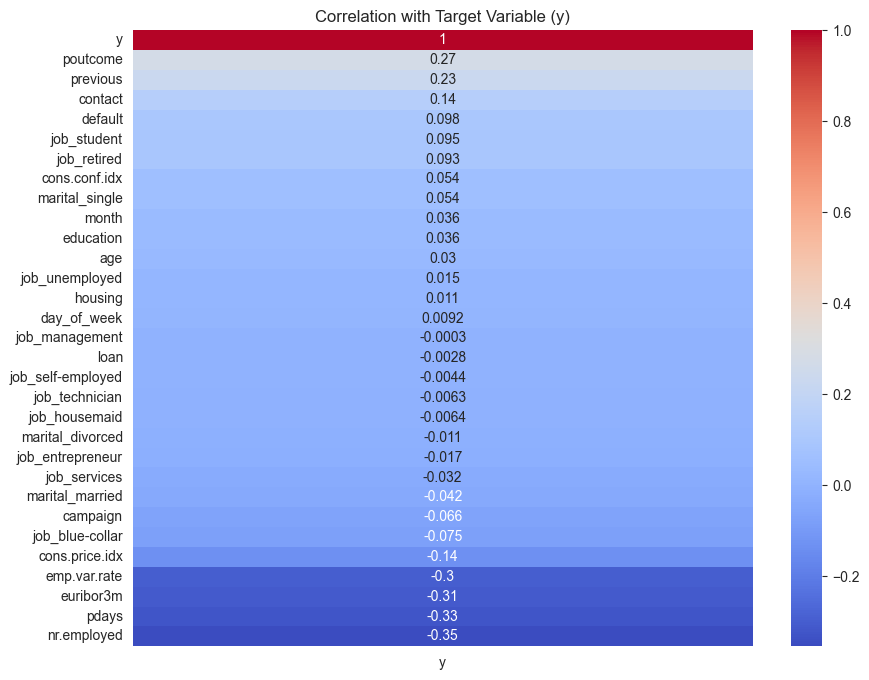

In [6]:
# Correlation matrix
correlation_matrix = data.corr()

# Visualize correlation with the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['y']].sort_values(by='y', ascending=False),
            annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation with Target Variable (y)")
plt.show()

In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

# Univariate Selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("Feature Scores:\n", feature_scores)

Feature Scores:
               Feature        Score
29        nr.employed  5866.512351
22              pdays  4858.657206
28          euribor3m  4261.975264
25       emp.var.rate  3975.560020
24           poutcome  3214.209902
23           previous  2259.042981
18            contact   871.657963
26     cons.price.idx   766.896256
15            default   398.391131
8         job_student   367.940473
5         job_retired   353.314849
1     job_blue-collar   231.765936
21           campaign   180.721852
27      cons.conf.idx   120.199742
11     marital_single   117.095904
12    marital_married    72.445983
19              month    53.018923
14          education    52.302910
7        job_services    42.602358
0                 age    37.777948
2    job_entrepreneur    11.805737
10     job_unemployed     9.368697
16            housing     5.155469
13   marital_divorced     4.966433
20        day_of_week     3.488355
3       job_housemaid     1.655937
9      job_technician     1.617071
6  

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)

Feature Importances:
               Feature  Importance
0                 age    0.179222
28          euribor3m    0.134597
21           campaign    0.086603
14          education    0.070861
20        day_of_week    0.061652
29        nr.employed    0.055047
16            housing    0.042333
22              pdays    0.037505
27      cons.conf.idx    0.032882
24           poutcome    0.031868
17               loan    0.028472
25       emp.var.rate    0.024637
26     cons.price.idx    0.021639
23           previous    0.018925
9      job_technician    0.017795
19              month    0.017616
15            default    0.014693
18            contact    0.014663
12    marital_married    0.014117
1     job_blue-collar    0.013155
11     marital_single    0.013067
7        job_services    0.011072
4      job_management    0.011032
13   marital_divorced    0.009304
5         job_retired    0.007461
6   job_self-employed    0.007023
2    job_entrepreneur    0.006350
8         job_student    0

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Original feature set
X_all_features = X
X_dropped_default = X.drop(columns=['default'])

# Train-test split for both cases
X_train_full, X_test_full, y_train, y_test = train_test_split(X_all_features, y, test_size=0.2, random_state=42)
X_train_dropped, X_test_dropped, _, _ = train_test_split(X_dropped_default, y, test_size=0.2, random_state=42)

# Train Random Forest with all features
model_full = RandomForestClassifier(random_state=42)
model_full.fit(X_train_full, y_train)
y_pred_full = model_full.predict(X_test_full)

# Train Random Forest without 'default'
model_dropped = RandomForestClassifier(random_state=42)
model_dropped.fit(X_train_dropped, y_train)
y_pred_dropped = model_dropped.predict(X_test_dropped)

# Compare Performance
print("Model with all features:")
print(classification_report(y_test, y_pred_full))
print("\nModel without 'default':")
print(classification_report(y_test, y_pred_dropped))

Model with all features:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7230
           1       0.54      0.29      0.37       928

    accuracy                           0.89      8158
   macro avg       0.73      0.63      0.66      8158
weighted avg       0.87      0.89      0.88      8158


Model without 'default':
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7230
           1       0.52      0.28      0.37       928

    accuracy                           0.89      8158
   macro avg       0.72      0.62      0.65      8158
weighted avg       0.87      0.89      0.87      8158



In [9]:
data = pd.read_csv('../bank_data_cleaned_final.csv')
data['y'].value_counts()

y
0    30901
1     4029
Name: count, dtype: int64